In [2]:
import numpy as np
import pandas as pd
import cv2
import PIL
import pytesseract
import spacy

In [3]:
img_cv=cv2.imread('rphall.jpg')

In [6]:
cv2.imshow('ID Card',img_cv)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
img_pl=PIL.Image.open('rphall.jpg')

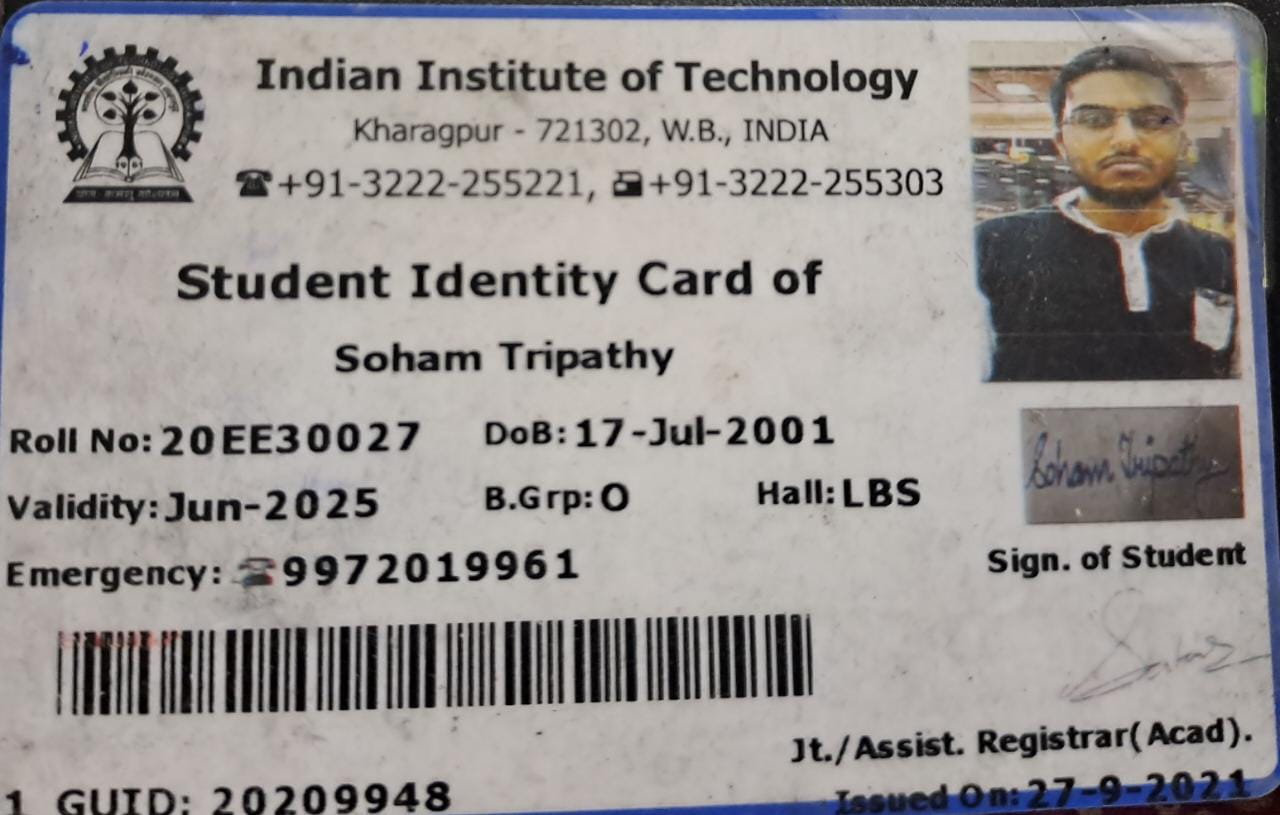

In [9]:
img_pl

In [14]:
###### Text form Image
text_cv=pytesseract.image_to_string(img_cv)

In [15]:
text_cv

'    \n   \n    \n     \n  \n   \n   \n\nIndian Institute of Technology\nKharagpur - 721302, W.B., INDIA\nfmm «© +91-3222-255221, &+91-3222-255303 |\n\n \n \n\nStudent Identity Card of\nSoham Tripathy\n\nRoll No:20EE30027 008:17-Jul-2001 ed\nValidity: Jun-2025 B.Grp:O Hall: LBS som ll\n\nEmergency: 29972019961 Sign. of Student\n\nOWA we\n\nJt./ Assist. Registrar( Acad).\n4 GILITD: 20209948\n\n   \n\n \n\x0c'

In [16]:
data=pytesseract.image_to_data(img_pl)

In [33]:
data.split('\n')
dataList=list(map(lambda x: x.split('\t'),data.split('\n')))

In [89]:
lst=dataList[1:]
cols=dataList[0]

In [96]:
df=pd.DataFrame(lst,columns=cols)

In [100]:
df.iloc[1:30]

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
1,2,1,1,0,0,0,0,0,1280,815,-1,
2,3,1,1,1,0,0,0,0,1280,815,-1,
3,4,1,1,1,1,0,0,0,1280,121,-1,
4,5,1,1,1,1,1,0,0,1280,121,95,
5,4,1,1,1,2,0,0,121,1280,117,-1,
6,5,1,1,1,2,1,0,121,1280,117,95,
7,4,1,1,1,3,0,0,238,1280,157,-1,
8,5,1,1,1,3,1,0,238,178,157,95,
9,5,1,1,1,3,2,822,238,458,89,95,
10,4,1,1,1,4,0,0,395,1280,78,-1,


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   level      102 non-null    object
 1   page_num   101 non-null    object
 2   block_num  101 non-null    object
 3   par_num    101 non-null    object
 4   line_num   101 non-null    object
 5   word_num   101 non-null    object
 6   left       101 non-null    object
 7   top        101 non-null    object
 8   width      101 non-null    object
 9   height     101 non-null    object
 10  conf       101 non-null    object
 11  text       101 non-null    object
dtypes: object(12)
memory usage: 9.7+ KB


In [102]:
df.dropna(inplace=True)

In [104]:
col_int=['level','page_num','block_num','par_num','line_num','word_num','left','top','width','height','conf']
df[col_int]=df[col_int].astype(int)

In [105]:
df.dtypes

level         int32
page_num      int32
block_num     int32
par_num       int32
line_num      int32
word_num      int32
left          int32
top           int32
width         int32
height        int32
conf          int32
text         object
dtype: object

In [106]:
img=img_pl.copy()

In [118]:
level='soham'
for l,left,top,width,height,confidence,txt in df[['level','left','top','width','height','conf','text']].values:
        #print(l,left,top,width,height,confidence)
        if level=='soham':
            if l==5:
                cv2.rectangle(img_cv,(left,top),(left+width,top+height),(0,0,0),2)
                cv2.putText(img_cv,txt,(left,top),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
            else:
                continue
cv2.imshow("vounding box",img_cv)  
cv2.waitKey()
cv2.destroyAllWindows

<function destroyAllWindows>